In [10]:
import pandas as pd
from matplotlib import colormaps

In [11]:
paid1 = pd.read_csv("流量行程详细信息_bingx.com_mexc.com_bybit.com_binance.com_bitget.com_付费搜索_7月 – 2024年9月_全球_所有设备.csv")
organic1 = pd.read_csv("流量行程详细信息_bingx.com_mexc.com_bybit.com_binance.com_bitget.com_自然搜索_7月 – 2024年9月_全球_所有设备.csv")
paid2 = pd.read_csv("流量行程详细信息_btcc.com_tapbit.com_付费搜索_7月 – 2024年9月_全球_所有设备.csv")
organic2 = pd.read_csv("流量行程详细信息_btcc.com_tapbit.com_自然搜索_7月 – 2024年9月_全球_所有设备.csv")

paid = pd.concat([paid1, paid2])
organic = pd.concat([organic1, organic2])

In [12]:

organic_comp = organic[organic["Source domain"].str.contains("yandex")]

df = organic_comp.groupby(["Source domain", "Domain"])["Visits"].sum() / organic_comp.groupby(["Source domain"])["Visits"].sum()

ax = df.unstack().plot(kind='bar', stacked=True, figsize=(100, 100), colormap='coolwarm')

for container in ax.containers:
    # 遍历每个条形图部分
    for i, rect in enumerate(container):
        height = rect.get_height()

        if height > 0:  # 避免在空条形上添加标签
            percentage = f"{height:.0%}"
            ax.text(
                rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2,
                f"{percentage}",
                ha='center', va='center', fontsize=70, color='black'
            )

ax.xaxis.set_tick_params(rotation=45, labelsize=70)
ax.set_title("Organic Traffic", fontsize=150, pad=20)
ax.legend(title="Domain", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=70)
ax.set_xlabel("Source Domain", fontsize=70)

Text(0.5, 0, 'Source Domain')

In [13]:
print("----------------Organic Traffic-------------------")
organic_traffic = pd.DataFrame(organic_comp.groupby(["Source domain", "Domain"])["Visits"].sum())
organic_traffic = organic_traffic.groupby("Source domain").apply(lambda x: x.sort_values("Visits", ascending=False))
organic_traffic

----------------Organic Traffic-------------------


Visits
Source domain Source domain Domain             
yandex.by     yandex.by     binance.com   37846
                            bitget.com     7096
                            bybit.com      6907
                            mexc.com       1772
                            bingx.com      1620
                            btcc.com        160
                            tapbit.com        0
yandex.com    yandex.com    btcc.com       2589
                            tapbit.com      410
yandex.com.tr yandex.com.tr btcc.com         55
                            tapbit.com        0
yandex.kz     yandex.kz     binance.com   28444
                            bybit.com      2428
                            btcc.com       1453
                            mexc.com       1194
                            bitget.com      811
                            bingx.com       349
                            tapbit.com        0
yandex.ru     yandex.ru     binance.com  710915
                            bybit.com    413482
                            bitget.com   145064
                            mexc.com      76936
                            bingx.com     52177
                            btcc.com       1228
                            tapbit.com        0

In [14]:
paid_comp = paid[paid["Source domain"].str.contains("yandex")]
paid_traffic = pd.DataFrame(paid_comp[paid_comp["Visits"]>0][["Source domain", "Domain", "Visits"]]).groupby(["Source domain", "Domain"]).sum()
print("----------------Paid Traffic-------------------")
paid_traffic

----------------Paid Traffic-------------------


,,Visits
Source domain,Domain,
yandex.by,bybit.com,767
yandex.ru,bybit.com,30625


----------------Bybit Traffic on Organic and Paid-------------------


Source domain,yandex.by,yandex.kz,yandex.ru
Organic,6907.0,2428.0,413482.0
Paid,767.0,NaN,30625.0


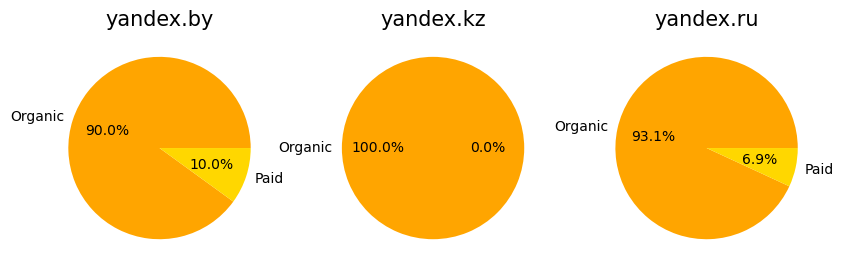

In [15]:
# 使用饼图比较bybit在organic和paid traffic中的流量占比
bybit_organic = organic_comp[organic_comp["Domain"] == "bybit.com"]
bybit_paid = paid_comp[paid_comp["Domain"] == "bybit.com"]

bybit = pd.DataFrame()

organic = bybit_organic.groupby("Source domain")["Visits"].sum()
bybit["Organic"] = organic

paid = bybit_paid.groupby("Source domain")["Visits"].sum()
bybit["Paid"] = paid

#bybit转置
bybit = bybit.T

# 画饼图, 设置颜色黄色
ax = bybit.plot.pie(subplots=True, figsize=(10, 5), autopct='%1.1f%%', legend=False, colors=['#FFA500', '#FFD700'])
# 设置各饼图标题的位置
for i, a in enumerate(ax):
    a.set_title(bybit.columns[i], fontsize=15)
    a.set_ylabel("")

print("----------------Bybit Traffic on Organic and Paid-------------------")
bybit
